<a href="https://colab.research.google.com/github/marvin-hansen/AI-FUN/blob/master/Socrates_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Philosophic quote generator



---

|    	|               	|
|---------	|-------------------------	|
| Author  	| Marvin Hansen           	|
| Contact 	| marvin.hansen@gmail.com 	|
| Version 	| 0.2                     	|
| Updated 	| April 30, 2019          	|



## Summary
---

@TODO 


## Changelog

---
* V-0.2 [Apr/30] Tuned parameters to optimze learning rate 
* V-0.1 [Apr/25] Added installs, imports, data loader, and procs

## Compatibility
---

Lib's
* Python Version: 3.6.7
* Pandas Version: 0.24.2
* Numpy Version: 1.16.3
* PyTorch Version: 1.0.1.post2


GPU Acceleration 
* GPU: NVDIA Tesla T4 
* Cuda V10.0.130


# Installs 

In [0]:
# update pandas 
!pip install --upgrade numpy

# update pandas 
!pip install --upgrade pandas  


# install latet fast.ai release
# https://github.com/fastai/fastai/releases
!curl -s https://course.fast.ai/setup/colab | bash
!ls

# Imports

In [2]:
import datetime
import platform
import warnings

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fastai
from fastai.imports import *
from fastai.basics import *
from fastai import *
from fastai.text import *


import platform
print("Done")

Done


## GPU Accelerations 

In [4]:
torch.cuda.current_device()

print("Cuda available: " + str(torch.cuda.is_available()))
print("Cuda enabled:" + str(torch.backends.cudnn.enabled))

#https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()


#Additional Info when using cuda
if device.type == 'cuda':
    print("GPU used: " + torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Cuda available: True
Cuda enabled:True
Using device: cuda

GPU used: Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


# Constants & Flags

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#batch size 
bs = 64
# bs = 32 
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html
np.random.seed(42) 

# Data

In [7]:
! wget https://github.com/paraschopra/generating-text-small-corpus/raw/master/data/quotes.csv

--2019-04-30 11:35:58--  https://github.com/paraschopra/generating-text-small-corpus/raw/master/data/quotes.csv
Resolving github.com (github.com)... 13.229.188.59, 52.74.223.119, 13.250.177.223
Connecting to github.com (github.com)|13.229.188.59|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/paraschopra/generating-text-small-corpus/master/data/quotes.csv [following]
--2019-04-30 11:35:58--  https://raw.githubusercontent.com/paraschopra/generating-text-small-corpus/master/data/quotes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1062011 (1.0M) [text/plain]
Saving to: ‘quotes.csv’

quotes.csv          100%[===================>]   1.01M  --.-KB/s    in 0.03s   

2019-04-30 11:35:59 (36.2 MB/s) -

In [8]:
df = pd.read_csv('quotes.csv', sep=r'\<\|\>', header=None, names=['text', 'author'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [11]:

df.head()


,text,author
0,A serious and good philosophical work could be...,Wittgenstein
1,The limits of my language means the limits of ...,Wittgenstein
2,"I don't know why we are here, but I'm pretty s...",Wittgenstein
3,"Whereof one cannot speak, thereof one must be ...",Wittgenstein
4,Hell isn't other people. Hell is yourself.,Wittgenstein


In [0]:
df['text'] = df['text'].str.lower()


Split & Train & Test

In [16]:
valid_pct = 0.10 #validation percent
df = df.iloc[np.random.permutation(len(df))]
cut = int(valid_pct * len(df)) + 1
train_df, valid_df = df[cut:], df[:cut]
len(train_df), len(valid_df)


(4616, 514)

In [17]:
nan_rows = df[df['text'].isnull()]

nan_rows


,text,author


# Prepare model


Create databunch

In [0]:
data_lm = TextLMDataBunch.from_df('data', train_df, valid_df, text_cols='text',
                           label_cols='author')

Create learner

In [0]:
learn.destroy()

learn = language_model_learner(data=data_lm,arch=AWD_LSTM, drop_mult=0.5)

print("Done! New Learner created!")

In [0]:
# Train model

In [212]:
learn.fit_one_cycle(3, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,4.635530,4.243089,0.247098,00:07
1,4.402325,4.154118,0.251920,00:07
2,4.187373,4.132975,0.255313,00:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


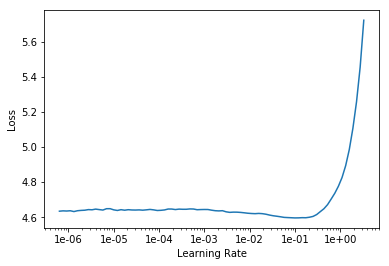

In [41]:
learn.lr_find()
learn.recorder.plot()

In [213]:
# re-train the entire model 
learn.unfreeze() 

# 10x optimal rate 
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.147532,4.096331,0.263929,00:09


epoch,train_loss,valid_loss,accuracy,time
0,2.688676,3.986783,0.290893,00:09
1,2.709300,3.986752,0.296875,00:09
2,2.603097,4.016577,0.301562,00:09
3,2.407762,4.050092,0.301295,00:09
4,2.255631,4.057918,0.304777,00:09


epoch,train_loss,valid_loss,accuracy,time
0,2.127328,4.066507,0.306384,00:09
1,2.126450,4.070932,0.306205,00:10
2,2.059707,4.100480,0.309777,00:09
3,1.969153,4.111407,0.312187,00:09
4,1.895402,4.124167,0.312187,00:10


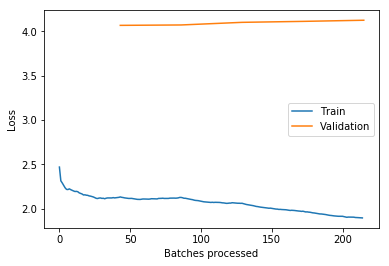

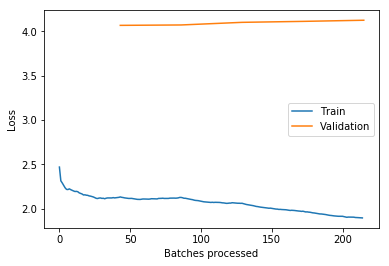

In [215]:
  # 10x optimal rate 
  cycles = 5
  lr =  1e-2
  
  # slice for learn rate gradient 
  learn.fit_one_cycle(cycles, slice(lr), wd=0.1)
 
 # smaller rate with smaller steps
  learn.fit_one_cycle(5, 1e-03, wd=0.1)
  # plot losses
  learn.recorder.plot_losses()

  # plot losses
  learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,1.844634,4.141326,0.312545,00:10
1,1.803508,4.169883,0.313571,00:10
2,1.732106,4.184914,0.316696,00:10
3,1.662007,4.207911,0.318393,00:10
4,1.592528,4.239671,0.318125,00:10
5,1.532584,4.266495,0.319777,00:10
6,1.466138,4.308172,0.319643,00:10
7,1.410037,4.317865,0.320804,00:10
8,1.339760,4.347308,0.321786,00:10
9,1.277074,4.385358,0.322411,00:10


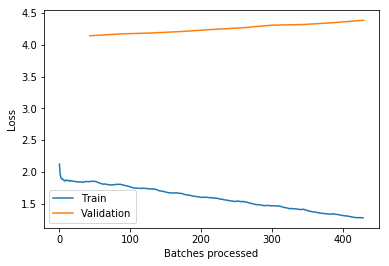

In [216]:
wd=1e-7
lr=1e-3
lrs = lr
epch = 10

learn.fit(epch, lrs, wd)
learn.recorder.plot_losses()

# Generate text (Just hit Ctrl-F10 to run all subsequent cells )

In [294]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'- half of the soul demanding rights and self - preservation , independence has never been so great as the man in the world . xxbos and i invented a brighter flame for you .'

In [295]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'- 2 x - power power . - the power of a society is determined by its victory over other societies in other finite games . american war , like the military or other political'

In [296]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'and 2 x - crude indignation systems [ 1 ] are called decisive . xxbos i know that even the most destitute men are not convinced of their reasons , not of the seriousness of'

In [297]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'dan orang menjadi manusia adalah sakit menjadi manusia kita pantas diri kita mencintai . kita hanya saling waktu . kita hanya punya waktu untuk menjadi bahagia , lalu menjadi diri kita dapat sendiri . xxbos'

In [298]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.7)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'- 4 .- a friend often gave a sign to the law of conservation of energy . but he does not put his law in motion . he does not believe that it is the'

In [299]:
idea = learn.predict("xxbos xxfld 1", n_words=25, temperature=0.95)
idea = idea.replace("xxbos xxfld 1 ","").strip()
idea 

'and 3 absolute murder xxbos the great delusion of modernity , is that the laws of nature describe the universe , we think it is'

In [300]:
idea = learn.predict("xxbos xxfld 1", n_words=25, temperature=0.95)
idea = idea.replace("xxbos xxfld 1 ","").strip()
idea 

'- 4 3 " . philosophy exercises solely on influence on plato who , like all party literature and religious a born man , feels'